<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-0.138137,119.303026,119.570676,-0.267650
1,0.0,1.0,57.329540,67.934475,0.467387,135.731401,135.461190,0.270211
2,0.0,2.0,45.215694,51.000161,0.140783,106.356637,106.437857,-0.081219
3,0.0,3.0,69.375325,41.455180,-0.568304,120.262200,120.959092,-0.696892
4,0.0,4.0,87.837297,72.508079,0.111376,170.456752,170.441442,0.015310
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,84.769209,31.648250,-0.215535,126.201924,126.269411,-0.067487
19996,999.0,16.0,26.755359,72.918584,0.440937,110.114880,109.787804,0.327076
19997,999.0,17.0,91.511024,97.355535,0.203610,199.070170,199.001142,0.069028
19998,999.0,18.0,74.275808,59.647742,-0.007651,143.915899,143.914060,0.001840


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,40.586643,-0.138137,119.303026,119.570676,-0.267650
1,0.0,1.0,57.329540,67.934475,0.467387,135.731401,135.461190,0.270211
2,0.0,2.0,45.215694,51.000161,0.140783,106.356637,106.437857,-0.081219
3,0.0,3.0,69.375325,41.455180,-0.568304,120.262200,120.959092,-0.696892
4,0.0,4.0,87.837297,72.508079,0.111376,170.456752,170.441442,0.015310
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,84.769209,31.648250,-0.215535,126.201924,126.269411,-0.067487
19996,999.0,16.0,26.755359,72.918584,0.440937,110.114880,109.787804,0.327076
19997,999.0,17.0,91.511024,97.355535,0.203610,199.070170,199.001142,0.069028
19998,999.0,18.0,74.275808,59.647742,-0.007651,143.915899,143.914060,0.001840


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  40.586643 -0.138137  119.303026  119.570676 -0.267650
      1.0    57.329540  67.934475  0.467387  135.731401  135.461190  0.270211
      2.0    45.215694  51.000161  0.140783  106.356637  106.437857 -0.081219
      3.0    69.375325  41.455180 -0.568304  120.262200  120.959092 -0.696892
      4.0    87.837297  72.508079  0.111376  170.456752  170.441442  0.015310
...                ...        ...       ...         ...         ...       ...
999.0 15.0   84.769209  31.648250 -0.215535  126.201924  126.269411 -0.067487
      16.0   26.755359  72.918584  0.440937  110.114880  109.787804  0.327076
      17.0   91.511024  97.355535  0.203610  199.070170  199.001142  0.069028
      18.0   74.275808  59.647742 -0.007651  143.915899  143.914060  0.001840
      19.0   29.688927  61.112719  1.183138  101.984784  100.859106  1.125678

[20000 rows x 6 columns]

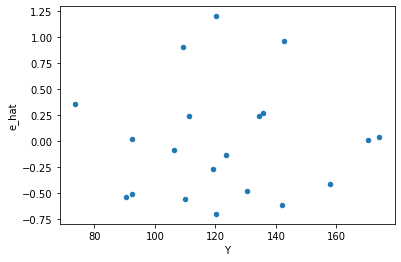

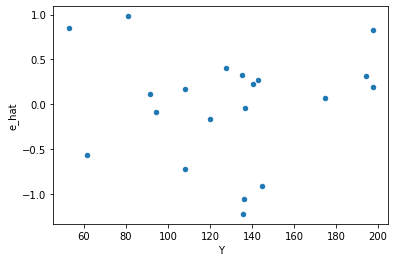

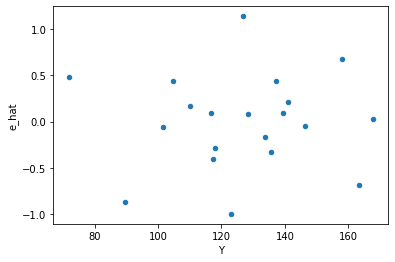

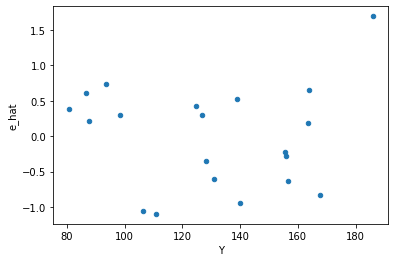

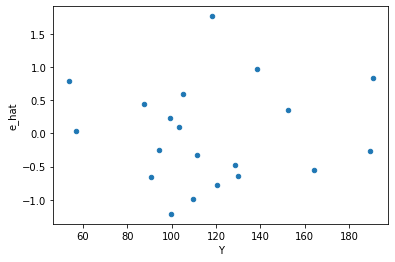

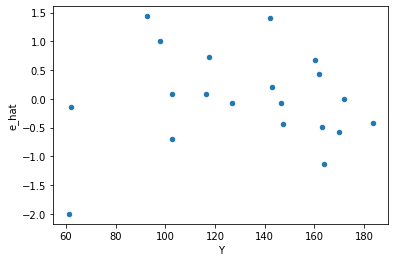

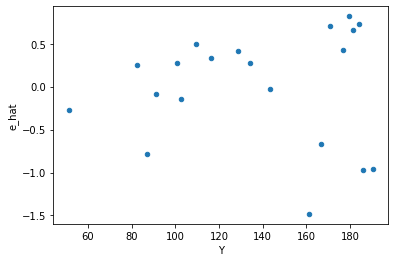

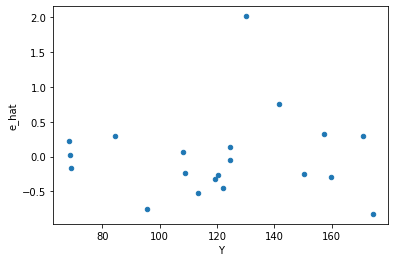

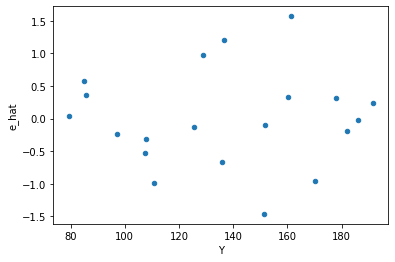

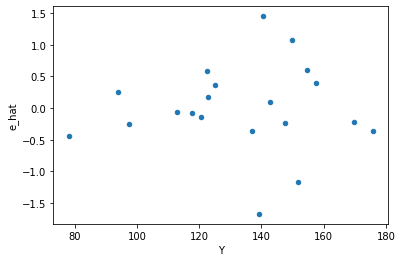

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,8.0,8.0,0.9280177093758954,6.561673934759494,0.11600221367198693,0.8202092418449367,7.070634394652133,0.012081563809281937,0.993959218095359,0.006040781904640968,Reject001=1 : Homoscedasticity
7.0,4.0,12.0,0.8864729282206926,5.445571680233647,0.22161823205517314,0.4537976400194706,2.0476548152703207,0.3027041328236568,0.8486479335881716,0.1513520664118284,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,2.928705069359131,3.0914958714770706,0.3254116743732368,0.44164226735386725,1.3571801571178963,0.7026108458057845,0.6486945770971078,0.35130542290289224,Reject001=1 : Homoscedasticity
12.0,7.0,9.0,1.7803078817903535,6.692169271351979,0.25432969739862193,0.7435743634835532,2.923663147045376,0.1368044868158489,0.9315977565920756,0.06840224340792445,Reject001=1 : Homoscedasticity
15.0,4.0,12.0,0.30305510530598423,4.517040675999748,0.07576377632649606,0.3764200563333124,4.968338097498857,0.02700389625347932,0.9864980518732603,0.01350194812673966,Reject001=1 : Homoscedasticity
16.0,9.0,7.0,3.7636528420025566,3.6101567568568247,0.41818364911139516,0.5157366795509749,1.2332779644705663,0.7998921209694072,0.6000539395152964,0.3999460604847036,Reject001=1 : Homoscedasticity
17.0,7.0,9.0,2.2867234991311776,8.223897050534012,0.3266747855901682,0.9137663389482236,2.7971743741942623,0.15301284931633607,0.923493575341832,0.07650642465816804,Reject001=1 : Homoscedasticity
18.0,6.0,10.0,1.687017727837392,3.8733767470017817,0.28116962130623196,0.38733767470017816,1.3775943250935874,0.6231023400082174,0.6884488299958913,0.3115511700041087,Reject001=1 : Homoscedasticity
19.0,4.0,12.0,2.1131958700660833,5.7249100552703664,0.5282989675165208,0.4770758379391972,0.9030413975289062,0.9849437532431484,0.5075281233784258,0.4924718766215742,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,3.8322192479480535,1.743767477659138,0.3832219247948053,0.2906279129431897,0.7583801816631583,0.6655411010963856,Reject001=1 : Homoscedasticity
1.0,10.0,6.0,3.767227139011988,2.0603523636652765,0.37672271390119877,0.3433920606108794,0.911524704881318,0.8531219566591771,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,3.614319641049066,1.3692792496246198,0.3614319641049066,0.22821320827076996,0.6314140168425459,0.49603612319769197,Reject001=1 : Homoscedasticity
3.0,11.0,5.0,5.848925658728965,0.9206645743358836,0.5317205144299059,0.1841329148671767,0.34629642804848004,0.1326170654548719,Reject001=1 : Homoscedasticity
4.0,11.0,5.0,7.2658072344611435,2.3147438872612947,0.6605279304055585,0.46294877745225893,0.7008769139679111,0.5777416267791939,Reject001=1 : Homoscedasticity
5.0,7.0,9.0,6.516587292112201,3.4970160140823996,0.9309410417303143,0.3885573348980444,0.41738124916680397,0.26232106577635506,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.9280177093758954,6.561673934759494,0.11600221367198693,0.8202092418449367,7.070634394652133,0.012081563809281937,Reject001=1 : Homoscedasticity
7.0,4.0,12.0,0.8864729282206926,5.445571680233647,0.22161823205517314,0.4537976400194706,2.0476548152703207,0.3027041328236568,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,2.928705069359131,3.0914958714770706,0.3254116743732368,0.44164226735386725,1.3571801571178963,0.7026108458057845,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      876
Reject001=0 : Heteroscedasticity    124
Name: Result_test, dtype: int64